
Learning Shapelets
==================

This example illustrates the use of the "Learning Shapelets" method for a time series classification task and
``tslearn``'s shapelet localization method.

More information on the method can be found at: http://fs.ismll.de/publicspace/LearningShapelets/.



In [26]:
# Author: Romain Tavenard
# License: BSD 3 clause

import numpy
from keras.optimizers import Adagrad
import matplotlib.pyplot as plt

from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMinMax
from tslearn.shapelets import ShapeletModel, grabocka_params_to_shapelet_size_dict
from tslearn.metrics import dtw_subsequence_path

In [2]:
numpy.random.seed(0)
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")
X_train = TimeSeriesScalerMinMax().fit_transform(X_train)
X_test = TimeSeriesScalerMinMax().fit_transform(X_test)
print(f"X_train.shape={X_train.shape}\nnumber of classes={numpy.unique(y_train)}")

X_train.shape=(100, 275, 1)
number of classes=[1 2 3 4]


In [3]:
shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=X_train.shape[0],
                                                       ts_sz=X_train.shape[1],
                                                       n_classes=len(set(y_train)),
                                                       l=0.1,
                                                       r=2)
shapelet_sizes

{27: 4, 54: 4}

In [4]:
shp_clf = ShapeletModel(n_shapelets_per_size=shapelet_sizes,
                        optimizer=Adagrad(lr=.1),
                        weight_regularizer=.01,
                        max_iter=50,
                        verbose_level=0)
shp_clf.fit(X_train, y_train)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


ShapeletModel(batch_size=256, max_iter=50,
       n_shapelets_per_size={27: 4, 54: 4},
       optimizer=<keras.optimizers.Adagrad object at 0x7feab08a2d30>,
       random_state=None, verbose_level=0, weight_regularizer=0.01)

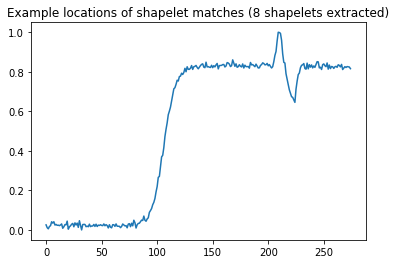

In [5]:
predicted_locations = shp_clf.locate(X_test)

test_ts_id = 0
plt.figure()
plt.title("Example locations of shapelet matches (%d shapelets extracted)" % sum(shapelet_sizes.values()))
plt.plot(X_test[test_ts_id].ravel())

In [6]:
X_test[test_ts_id].shape

(275, 1)

In [7]:
X_test[test_ts_id].ravel().shape

(275,)

In [8]:
shp_clf.shapelets_[0].shape

(27, 1)

In [33]:
path, dist = dtw_subsequence_path(shp_clf.shapelets_[5], X_test[0])
dist

1.6431986142038502

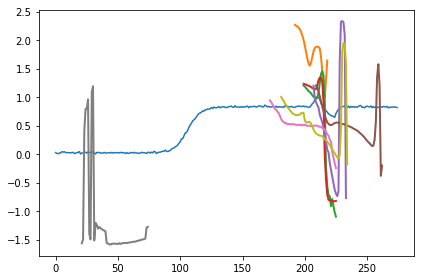

In [9]:
plt.plot(X_test[test_ts_id].ravel())
for idx_shp, shp in enumerate(shp_clf.shapelets_):
    t0 = predicted_locations[test_ts_id, idx_shp]
    plt.plot(numpy.arange(t0, t0 + len(shp)), shp, linewidth=2)

plt.tight_layout()
plt.show()

In [10]:
y_train[0] == shp_clf.predict([X_train[0]])[0]

True

In [11]:
shp_clf.predict_proba([X_train[0]])

array([[0.7060774 , 0.1180281 , 0.13777918, 0.03811536]], dtype=float32)

In [12]:
params = shp_clf.get_params(deep=True)
params

{'batch_size': 256,
 'max_iter': 50,
 'n_shapelets_per_size': {27: 4, 54: 4},
 'optimizer': <keras.optimizers.Adagrad at 0x7feab08a2d30>,
 'random_state': None,
 'verbose_level': 0,
 'weight_regularizer': 0.01}

In [13]:
shp_clf2 = ShapeletModel(n_shapelets_per_size=shapelet_sizes,
                        optimizer=Adagrad(lr=.1),
                        weight_regularizer=.01,
                        max_iter=50,
                        verbose_level=0)
shp_clf2.fit(X_train, y_train)
shp_clf2.predict_proba([X_train[0]])

array([[0.82309777, 0.03879754, 0.11279479, 0.0253099 ]], dtype=float32)

In [14]:
shp_clf2.set_params(**params)
shp_clf2.predict_proba([X_train[0]])

array([[0.82309777, 0.03879754, 0.11279479, 0.0253099 ]], dtype=float32)

In [15]:
shp_clf3 = shp_clf2

In [16]:
shp_clf3.predict_proba([X_train[0]])

array([[0.82309777, 0.03879754, 0.11279479, 0.0253099 ]], dtype=float32)